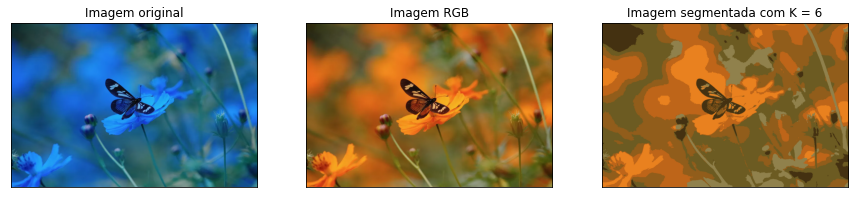

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#CARREGANDO A IMAGEM
original_image = cv2.imread('img.jpg')

#FUNÇÃO PARA TRANSFORMAR DE BGR PARA RGB
def RGB(img_bgr):
    l, c, p = img_bgr.shape

    img_rgb = np.zeros(shape = img_bgr.shape, dtype = np.uint8)

    for i in range(l):
        for j in range(c):
            b = img_bgr[i, j, 0] 
            g = img_bgr[i, j, 1] 
            r = img_bgr[i, j, 2] 
        
            img_rgb[i, j, 0] = r
            img_rgb[i, j, 1] = g
            img_rgb[i, j, 2] = b
            
    return img_rgb

#TRANSFORMANDO A IMAGEM GBR EM RGB
img = RGB(original_image)   

#CONVERTENDO A IMAGEM EM UMA MATRIZ PX3 ONDE P=MxN E CADA LINHA AGORA É UM VETOR NO ESPAÇO 3D
vectorized = img.reshape((-1,3))

#CONVERTENDO OS VALORES uint8 PARA float (REQUISITO DO MÉTODO K-MEANS)
vectorized = np.float32(vectorized)

#DEFININDO CRITÉRIOS, NÚMERO DE AGRUPAMENTOS(K) E APLICANDO K-MEANS
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#NÚMERO DE AGRUPAMENTO (NÚMEROS DE CORES QUE QUERO NA IMAGEM SEGMENTADA)
K = 6 #numero aproximado de cores da imagem original

#NUMERO DE VEZES QUE O ALGORITMO É EXECUTADO USANDO DIFERENTES CLASSIFICAÇÕES INICIAIS
#O ALGORITMO RETORNA OS ROTULOS QUE PRODUZEM MELHOR COMPACTAÇÃO
attempts = 10

#ESPECIFICA COMO OS CENTROS INICIAIS SÃO OBTIDOS
ret,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

#CONVERTENDO DE VOLTA PARA uint8
center = np.uint8(center)

#ACESSANDO OS ROTULOS PARA REGENERAR A IMAGEM AGRUPADA
res = center[label.flatten()]
result_image = res.reshape((img.shape))

#PLOTANDO A IMAGEM ORIGINAL E A IMAGEM RESULTANTE DO AGRUPAMENTO
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(original_image)
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img)
plt.title('Imagem RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(result_image)
plt.title('Imagem segmentada com K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# Referências:
* https://pt.wikipedia.org/wiki/Segmenta%C3%A7%C3%A3o_(processamento_de_imagem)
* https://acervolima.com/segmentacao-de-imagens-por-cluster/#:~:text=O%20agrupamento%20K%2Dmeans%20%C3%A9,de%20grupos%20representados%20por%20K.
* https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html